<a href="https://colab.research.google.com/github/coll-j/Tugas-KK/blob/master/Minggu-3/Using_SKLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline   

In [ ]:
!wget https://raw.githubusercontent.com/coll-j/Tugas-KK/master/Minggu-1/data.csv

--2020-10-26 14:39:53--  https://raw.githubusercontent.com/coll-j/Tugas-KK/master/Minggu-1/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.41M  --.-KB/s    in 0.1s    

2020-10-26 14:39:54 (13.6 MB/s) - ‘data.csv’ saved [1475504/1475504]



# Load Dataset

Load dataset menggunakan fungsi `read_csv` pada Pandas, fungsi tersebut mengembalikan Dataframe berisi dataset yang diload. 

Print beberapa baris pertama dari dataframe tersebut menggunakan fungsi `head` untuk memberikan gambaran isi data.

In [ ]:
df = pd.read_csv('data.csv')
df.head()

NameError: ignored

In [ ]:
df.dtypes

NameError: ignored

Fungsi `len` memberikan jumlah record yang tersimpan pada dataset. Pada dataset ini berisi **11914** record.

Fungsi `describe` memberikan gambaran seperti jumlah (bukan nan), rata-rata, min, max, dll pada kolom numerik. Dari data **count** terlihat di beberapa kolum memiliki nilai kosong.

In [ ]:
len(df)

11914

In [ ]:
df.describe(include='all')

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
count,11914,11914,11914.000000,11911,11845.00000,11884.000000,11914,11914,11908.000000,8172,11914,11914,11914.000000,11914.000000,11914.000000,1.191400e+04
unique,48,915,NaN,10,NaN,NaN,5,4,NaN,71,3,16,NaN,NaN,NaN,NaN
top,Chevrolet,Silverado 1500,NaN,regular unleaded,NaN,NaN,AUTOMATIC,front wheel drive,NaN,Crossover,Compact,Sedan,NaN,NaN,NaN,NaN
freq,1123,156,NaN,7172,NaN,NaN,8266,4787,NaN,1110,4764,3048,NaN,NaN,NaN,NaN
mean,NaN,NaN,2010.384338,NaN,249.38607,5.628829,NaN,NaN,3.436093,NaN,NaN,NaN,26.637485,19.733255,1554.911197,4.059474e+04
std,NaN,NaN,7.579740,NaN,109.19187,1.780559,NaN,NaN,0.881315,NaN,NaN,NaN,8.863001,8.987798,1441.855347,6.010910e+04
min,NaN,NaN,1990.000000,NaN,55.00000,0.000000,NaN,NaN,2.000000,NaN,NaN,NaN,12.000000,7.000000,2.000000,2.000000e+03
25%,NaN,NaN,2007.000000,NaN,170.00000,4.000000,NaN,NaN,2.000000,NaN,NaN,NaN,22.000000,16.000000,549.000000,2.100000e+04
50%,NaN,NaN,2015.000000,NaN,227.00000,6.000000,NaN,NaN,4.000000,NaN,NaN,NaN,26.000000,18.000000,1385.000000,2.999500e+04
75%,NaN,NaN,2016.000000,NaN,300.00000,6.000000,NaN,NaN,4.000000,NaN,NaN,NaN,30.000000,22.000000,2009.000000,4.223125e+04


# Data cleaning

Dapat terlihat dari cell sebelumnya kolom yang memiliki nilai null adalah:
- Engine HP
- Engine Cylinder
- Engine Fuel Type
- Number of Doors
- Market Category
 
Untuk data cleaning yang akan dilakukan adalah:
- null replacement pada kolom engine hp, cylinder, fuel type
- drop kolom num of doors, market category

## Null Replacement Engine Cylinders

Karena jumlah silinder dapat dilihat dari mobilnya, maka dicek mobil apa saja yang memiliki nilai null dengan mengelompokkan berdasarkan brand dan jenisnya. Di sini dapat terlihat ada 6 mobil yang memiliki record null pada Engine Cylinder.

In [ ]:
list(df[df['Engine Cylinders'].isnull()].groupby(['Make','Model']).groups.keys())

[('Chevrolet', 'Bolt EV'),
 ('Mazda', 'RX-7'),
 ('Mazda', 'RX-8'),
 ('Mitsubishi', 'i-MiEV'),
 ('Toyota', 'RAV4 EV'),
 ('Volkswagen', 'e-Golf')]

Setelah melakukan pencarian, ternyata 4 dari mobil tersebut (kecuali Mazda) adalah mobil elektrik yang mesinnya tidak memiliki silinder. Untuk mobil Mazda pun menggunakan mesin *Wankel* yang tidak memiliki silinder. Maka untuk kolom ini nilai null akan diganti dengan 0.

In [ ]:
df.loc[df['Engine Cylinders'].isnull(), 'Engine Cylinders'] = 0
df['Engine Cylinders'].describe()

count    11914.000000
mean         5.614655
std          1.800554
min          0.000000
25%          4.000000
50%          6.000000
75%          6.000000
max         16.000000
Name: Engine Cylinders, dtype: float64

## Null Replacement Engine HP

Pada kolom ini nilai null diganti dengan nilai tengah karena nilai rata-rata bisa jadi terpengaruh oleh outlier

In [ ]:
print(df['Engine HP'].mean())
print(df['Engine HP'].median())

249.38607007176023
227.0


In [ ]:
df.loc[df['Engine HP'].isnull(), 'Engine HP'] = df['Engine HP'].median()
df['Engine HP'].describe()

count    11914.000000
mean       249.256421
std        108.888444
min         55.000000
25%        170.000000
50%        227.000000
75%        300.000000
max       1001.000000
Name: Engine HP, dtype: float64

## Null Replacement Fuel Type

Nilai null pada fuel type diganti dengan modus dari keseluruhan kolom dengan asumsi mobil memakai bahan bakar yang sering dipakai.

In [ ]:
print(df['Engine Fuel Type'].mode()[0])
print(df['Engine Fuel Type'].isnull().sum())

regular unleaded
3


In [ ]:
df.loc[df['Engine Fuel Type'].isnull(), 'Engine Fuel Type'] = df['Engine Fuel Type'].mode()[0]
df['Engine Fuel Type'].describe()

count                11914
unique                  10
top       regular unleaded
freq                  7175
Name: Engine Fuel Type, dtype: object

## Drop

Kolom Number of Doors dan Market Category didrop selain karena memiliki null value yang banyak, dianggap kurang berpengaruh pada harga mobil.

In [ ]:
df.drop(['Number of Doors', 'Market Category'], axis=1, inplace=True)
df.describe(include='all')

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
count,11914,11914,11914.000000,11914,11914.000000,11914.000000,11914,11914,11914,11914,11914.000000,11914.000000,11914.000000,1.191400e+04
unique,48,915,NaN,10,NaN,NaN,5,4,3,16,NaN,NaN,NaN,NaN
top,Chevrolet,Silverado 1500,NaN,regular unleaded,NaN,NaN,AUTOMATIC,front wheel drive,Compact,Sedan,NaN,NaN,NaN,NaN
freq,1123,156,NaN,7175,NaN,NaN,8266,4787,4764,3048,NaN,NaN,NaN,NaN
mean,NaN,NaN,2010.384338,NaN,249.256421,5.614655,NaN,NaN,NaN,NaN,26.637485,19.733255,1554.911197,4.059474e+04
std,NaN,NaN,7.579740,NaN,108.888444,1.800554,NaN,NaN,NaN,NaN,8.863001,8.987798,1441.855347,6.010910e+04
min,NaN,NaN,1990.000000,NaN,55.000000,0.000000,NaN,NaN,NaN,NaN,12.000000,7.000000,2.000000,2.000000e+03
25%,NaN,NaN,2007.000000,NaN,170.000000,4.000000,NaN,NaN,NaN,NaN,22.000000,16.000000,549.000000,2.100000e+04
50%,NaN,NaN,2015.000000,NaN,227.000000,6.000000,NaN,NaN,NaN,NaN,26.000000,18.000000,1385.000000,2.999500e+04
75%,NaN,NaN,2016.000000,NaN,300.000000,6.000000,NaN,NaN,NaN,NaN,30.000000,22.000000,2009.000000,4.223125e+04


# Data Visualization

Melihat distribusi jumlah mobil per tahun dalam data.

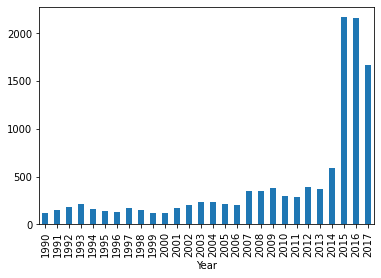

In [ ]:
df_year_dist = df.groupby('Year')['Make'].count()
df_year_dist.plot.bar()

## Harga per Tahun sesuai merk

Distribusi harga mobil per tahun dikategorikan sesuai merk pada tahun sebelum 200

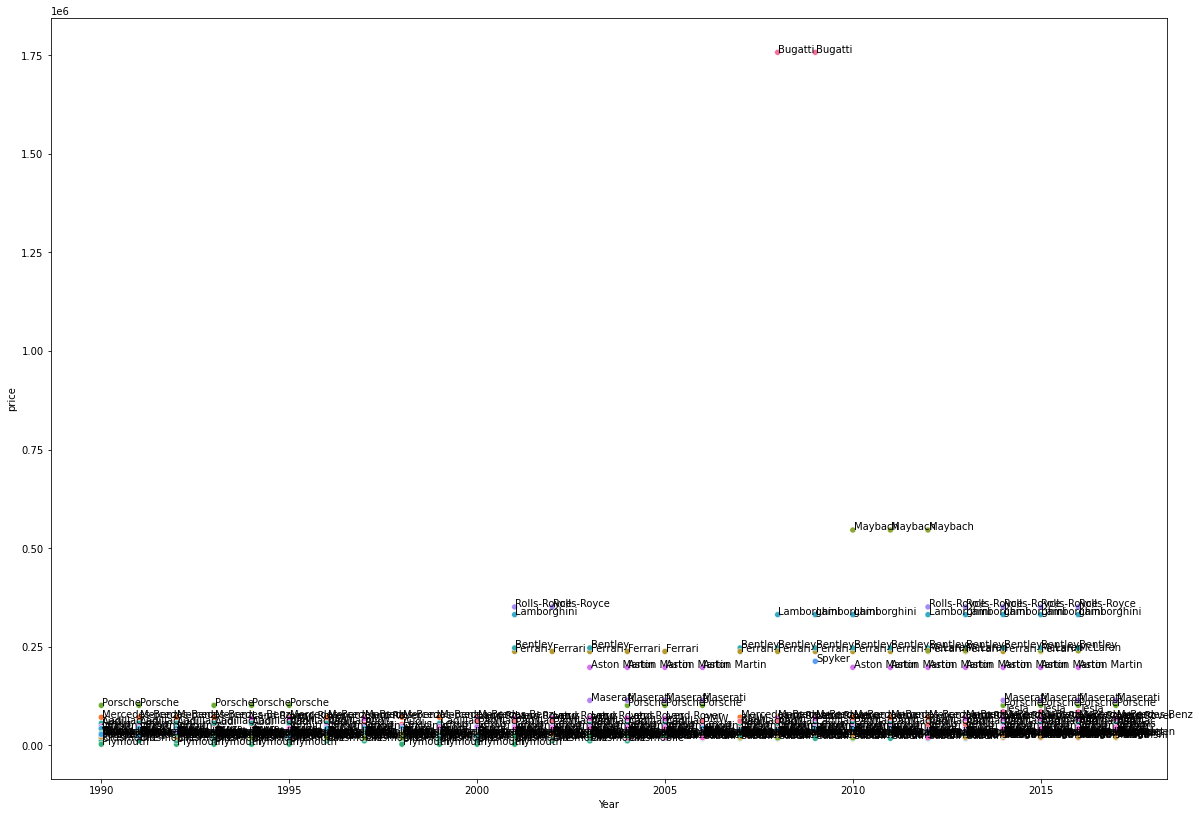

In [ ]:
fig, ax = plt.subplots(figsize=(20, 14))
df_by_brand = df.copy()
df_by_brand['price'] = df_by_brand.groupby(['Make'])['MSRP'].transform('mean')
df_by_brand = df_by_brand.loc[:, ('Make', 'Year', 'price')]
df_by_brand.drop_duplicates(inplace=True)
sns.scatterplot(data=df_by_brand, x='Year', y='price', hue='Make', legend=False)
a = pd.concat({'x': df_by_brand['Year'], 'y': df_by_brand['price'], 'val': df_by_brand['Make']}, axis=1)
for i, point in a.iterrows():
  ax.text(point['x']+.02, point['y'], str(point['val']))

https://www.autoblog.com/buy/2008-Bugatti-Veyron/specs/
https://www.edmunds.com/bugatti/veyron-164/2008/coupe/#:~:text=For%20those%20who%20aren't,at%20a%20cool%20%242.0%20million.

In [ ]:
fig, ax = plt.subplots(figsize=(20, 14))
df_after_2000 = df.loc[df['Year'] >= 2000]
df_after_2000['price'] = df_after_2000.groupby(['Make'])['MSRP'].transform('mean')
df_after_2000 = df_after_2000.loc[:, ('Make', 'Year', 'price')]
df_after_2000.drop_duplicates(inplace=True)
sns.scatterplot(data=df_after_2000, x='Year', y='price', hue='Make', legend=False)
a = pd.concat({'x': df_after_2000['Year'], 'y': df_after_2000['price'], 'val': df_after_2000['Make']}, axis=1)
for i, point in a.iterrows():
  ax.text(point['x']+.02, point['y'], str(point['val']))

## Popularitas dan Harga
10 merk dengan popularitas berdasarkan rata-ratanya.
Jika popularitas merupakan faktor yang sangat mempengaruhi harga mobil, semakin tinggi popularitas maka harga semakin tinggi.

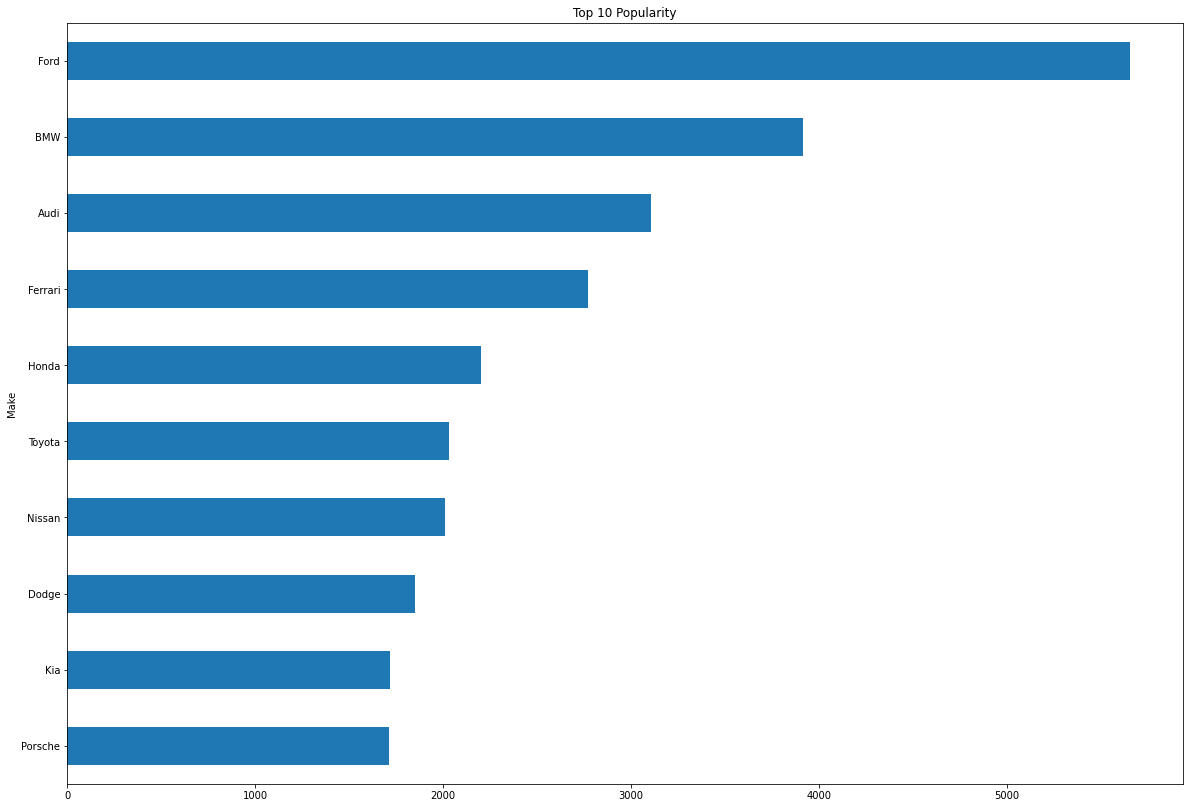

In [ ]:
df_pop = df.groupby('Make')['Popularity'].mean().sort_values()
df_pop.tail(10).plot(kind='barh', figsize=(20, 14), title='Top 10 Popularity')

Jika dilihat dari scatterplot antara popularitas dan harga, terlihat bahwa popularitas tidak mempengaruhi harga mobil. Mobil dengan popularitas > 5000 memiliki harga lebih rendah dari mobil dengan popularitas yang lebih rendah.

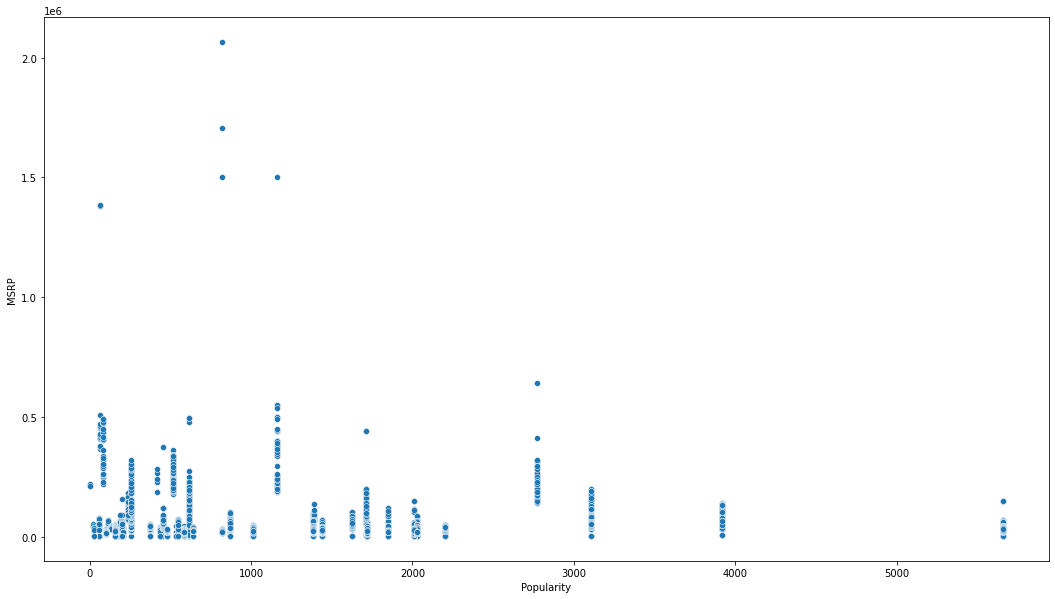

In [ ]:
fig, ax = plt.subplots(figsize=(18, 10))
sns.scatterplot(data=df, x='Popularity', y='MSRP')

## Distribusi Bahan Bakar

Sebelum tahun 2000

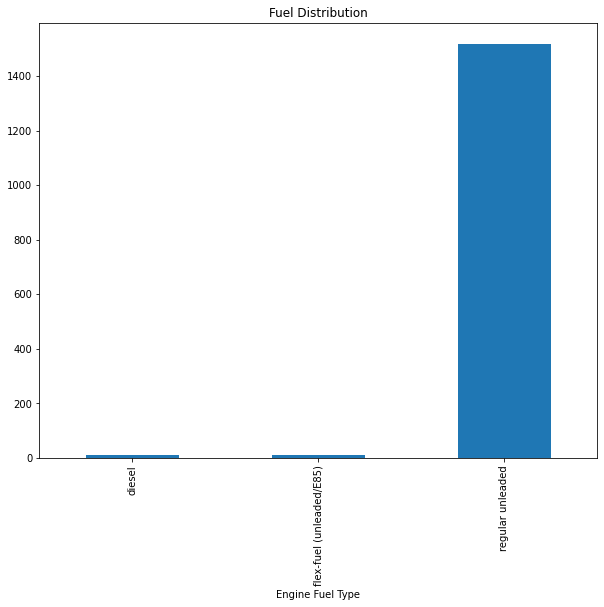

In [ ]:
df_fuel_bfr_2000 = df.loc[df['Year'] < 2000]
df_fuel_bfr_2000 = df_fuel_bfr_2000.groupby('Engine Fuel Type')['Year'].count().sort_values()
df_fuel_bfr_2000.plot.bar(figsize=(10, 8), title='Fuel Distribution')

Setelah tahun 2000 terdapat penambahan jenis bahan bakar. Ini terjadi karena inovasi yang ada, seperti mobil elektrik

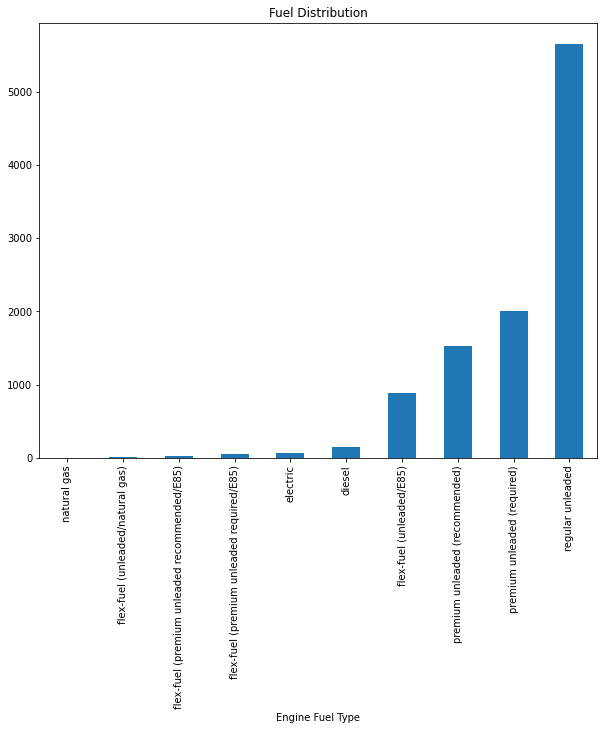

In [ ]:
df_fuel_aft_2000 = df.loc[df['Year'] >= 2000]
df_fuel_aft_2000 = df_fuel_aft_2000.groupby('Engine Fuel Type')['Year'].count().sort_values()
df_fuel_aft_2000.plot.bar(figsize=(10, 8), title='Fuel Distribution')

## Distribusi jumlah mobil

Sebelum tahun 2000

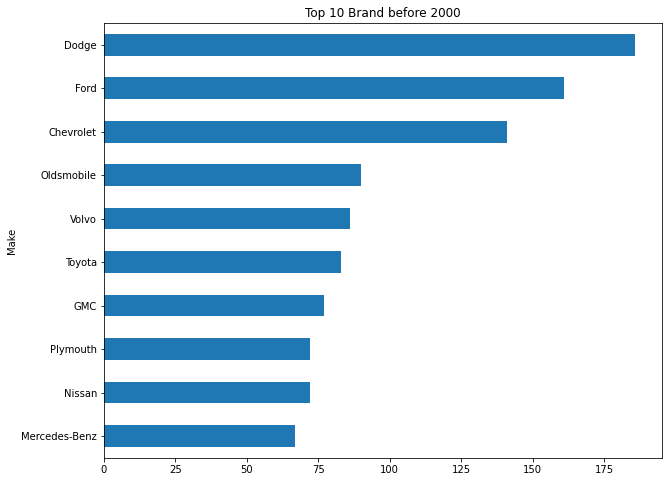

In [ ]:
df_brand_bfr_2000 = df.loc[df['Year'] < 2000]
df_brand_bfr_2000 = df_brand_bfr_2000.groupby('Make')['Year'].count().sort_values()
df_brand_bfr_2000.tail(10).plot(kind='barh', figsize=(10, 8), title='Top 10 Brand before 2000')

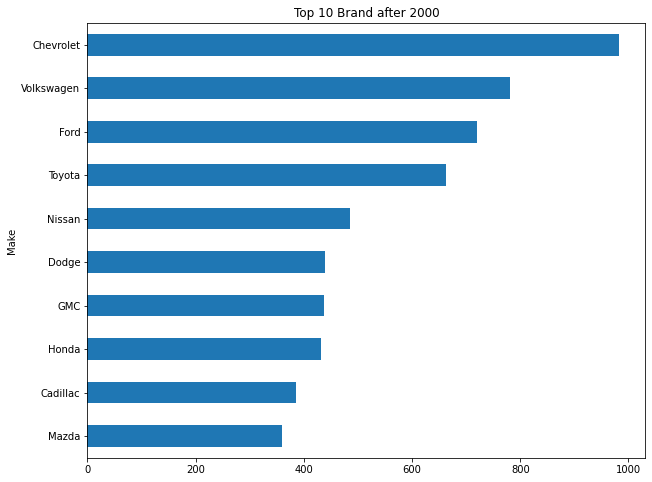

In [ ]:
df_brand_aft_2000 = df.loc[df['Year'] >= 2000]
df_brand_aft_2000 = df_brand_aft_2000.groupby('Make')['Year'].count().sort_values()
df_brand_aft_2000.tail(10).plot(kind='barh', figsize=(10, 8), title='Top 10 Brand after 2000')

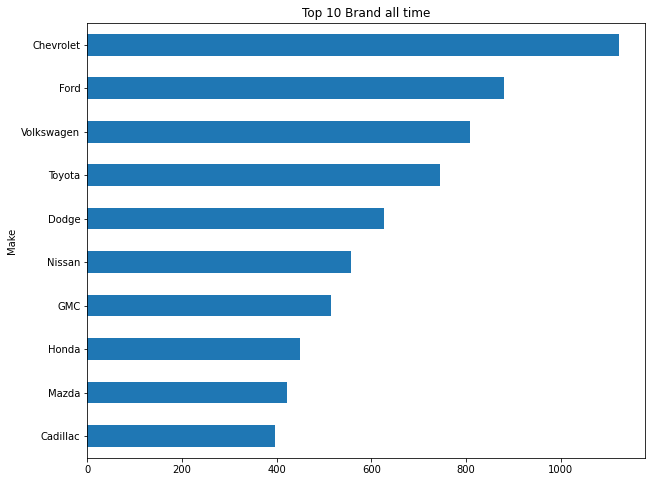

In [ ]:
df_brand = df.groupby('Make')['Year'].count().sort_values()
df_brand.tail(10).plot(kind='barh', figsize=(10, 8), title='Top 10 Brand all time')

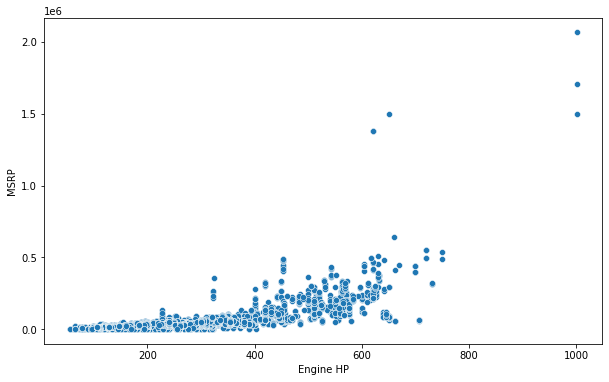

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=df, x='Engine HP', y='MSRP', legend=False)
# sns.scatterplot(data=df, x='Engine HP', y='MSRP', hue='Make', legend=False)
# a = pd.concat({'x': df['Engine HP'], 'y': df['MSRP'], 'val': df['Make']}, axis=1)
# for i, point in a.iterrows():
#   ax.text(point['x']+.02, point['y'], str(point['val']))

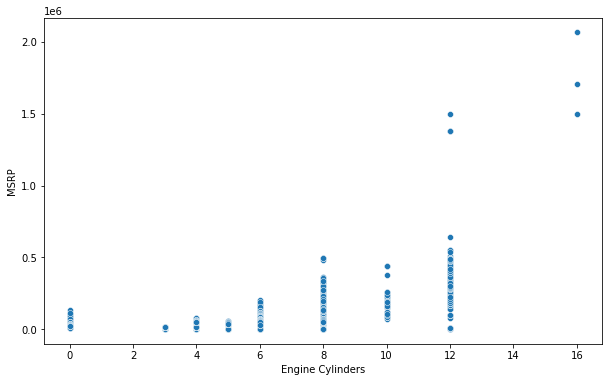

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=df, x='Engine Cylinders', y='MSRP', legend=False)
# sns.scatterplot(data=df, x='Engine HP', y='MSRP', hue='Make', legend=False)
# a = pd.concat({'x': df['Engine HP'], 'y': df['MSRP'], 'val': df['Make']}, axis=1)
# for i, point in a.iterrows():
#   ax.text(point['x']+.02, point['y'], str(point['val']))

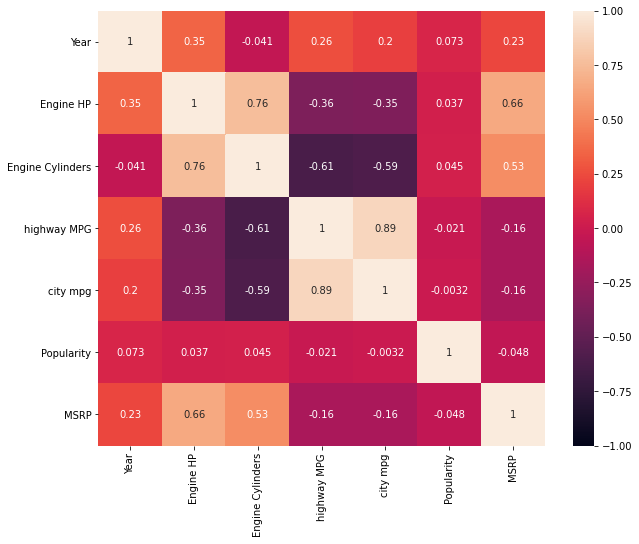

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, vmin=-1.0, vmax=1.0, ax=ax)

# Kesimpulan

  EDA Merupakan proses memahami kumpulan data dengan meringkas karakteristik utama data tersebut, yang kemudian hasilnya ditampilkan secara visual. EDA sangat penting dilakukan terutama ketika kita ingin melakukan pemodelan data untuk penerapan Machine Learning.

  Proses pertama yang harus dilakukan tentunya memasukan data ke Data Frame. Data Frame yang digunakan kali ini adalah Pandas, dengan bahasa pemrograman python. Kemudian harus dikakukan Data Cleaning, Data Cleaning penting dilakukan karena terkadang ada data tidak digunakan atau memiliki nilai null. Terakhir, Data Visualization, yaitu menampilkan data yang telah diolah secara visual.

Dari visualisasi data tersebut, dapat disimpulkan bahwa harga mobil (MSRP) paling dipengaruhi oleh HP mesin.

  

Dalam EDA, pada saat tertentu akan muncul suatu kasus yang disebut Outliers. Outliers merupakan sebuah kasus dimana muncul suatu titik dalam data yang sudah divisualisasi yang posisinya jauh dari titik-titik lainnya. Outliers merupakan salah satu faktor yang menyebabkan data menjadi tidak akurat, maka dari itu Outliers perlu dihilangkan.

**Additional note:** EDA ini berdasarkan data yang digunakan, belum tentu persis dengan kenyataannya

# Clustering Engine HP, Cylinder, Year

In [ ]:
import sklearn
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression, f_classif
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import silhouette_score
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    fig, ax = plt.subplots(figsize=(20, 14))
    dendrogram(linkage_matrix, **kwargs)

In [ ]:
df['MSRP'].head()

0    46135
1    40650
2    36350
3    29450
4    34500
Name: MSRP, dtype: int64

In [ ]:
print(df['MSRP'].quantile(0.25))
print(df['MSRP'].quantile(0.50))
print(df['MSRP'].quantile(0.75))

21000.0
29995.0
42231.25


In [ ]:
conditions = [
             (df['MSRP'] <= 21000),
             (df['MSRP'] > 21000) & (df['MSRP'] <= 29995),
             (df['MSRP'] > 29995) & (df['MSRP'] <= 42231.75),
             (df['MSRP'] > 42231.75)
]

values = ['bawah', 'menengah-bawah', 'menengah-atas', 'atas']

In [ ]:
df['tier'] = np.select(conditions, values)
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,tier
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135,atas
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650,menengah-atas
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350,menengah-atas
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450,menengah-bawah
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500,menengah-atas


In [ ]:
data = df.select_dtypes(exclude='object')
X = data.iloc[:,:-1]  #exclude MSRP
y = df['tier']
scaler = MinMaxScaler()
X_norm  = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
print(X.head())
print(y.head())
print(X_norm.head())

   Year  Engine HP  Engine Cylinders  highway MPG  city mpg  Popularity
0  2011      335.0               6.0           26        19        3916
1  2011      300.0               6.0           28        19        3916
2  2011      300.0               6.0           28        20        3916
3  2011      230.0               6.0           28        18        3916
4  2011      230.0               6.0           28        18        3916
0              atas
1     menengah-atas
2     menengah-atas
3    menengah-bawah
4     menengah-atas
Name: tier, dtype: object
       Year  Engine HP  Engine Cylinders  highway MPG  city mpg  Popularity
0  0.777778   0.295983             0.375     0.040936  0.092308    0.692131
1  0.777778   0.258985             0.375     0.046784  0.092308    0.692131
2  0.777778   0.258985             0.375     0.046784  0.100000    0.692131
3  0.777778   0.184989             0.375     0.046784  0.084615    0.692131
4  0.777778   0.184989             0.375     0.046784  0.08461

In [ ]:
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(X_norm,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_norm.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

              Specs        Score
1         Engine HP  5651.274321
0              Year  3154.320540
2  Engine Cylinders  1279.221335
4          city mpg   133.258888
3       highway MPG   124.798892
5        Popularity    10.453522


In [ ]:
bestfeatures1 = SelectKBest(score_func=f_regression, k='all')
fit1 = bestfeatures1.fit(X_norm,df['MSRP'])
dfscores1 = pd.DataFrame(fit1.scores_)
dfcolumns1 = pd.DataFrame(X_norm.columns)
#concat two dataframes for better visualization 
featureScores1 = pd.concat([dfcolumns1,dfscores1],axis=1)
featureScores1.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores1.nlargest(10,'Score'))  #print 10 best features

              Specs        Score
1         Engine HP  9263.104946
2  Engine Cylinders  4562.984905
0              Year   650.710554
3       highway MPG   313.130320
4          city mpg   303.702313
5        Popularity    28.058482


## Hierarchical (Agglomerative) Clustering

### Clustering with GridSearch

In [ ]:
param_grid = {
    'n_clusters': range(2, 9),
    'linkage': ['ward', 'complete', 'average', 'single']
    }
cv = [(slice(None), slice(None))]
def silhouette_scr(estimator, X_norm):
  estimator.fit(X_norm)
  labels = estimator.labels_
  sil_avg = silhouette_score(X_norm, labels)
  return sil_avg
grid_search = GridSearchCV(estimator=AgglomerativeClustering(), param_grid=param_grid,
              scoring=silhouette_scr, cv=cv, n_jobs=-1)
grid_search.fit(X_norm[['Engine HP', 'Year', 'Engine Cylinders']])
print("parameter: ", grid_search.best_params_)
print("silhouette score: ", grid_search.best_score_)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



parameter:  {'linkage': 'average', 'n_clusters': 2}
silhouette score:  0.6315042534456045


### Clustering 1: 2 clusters

In [ ]:
agglo_cluster = AgglomerativeClustering(n_clusters=2, linkage='average')
agglo_cluster.fit(X_norm[['Engine HP', 'Year', 'Engine Cylinders']])

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=2)

In [ ]:
fig = px.scatter_3d(X, x='Engine HP', y='Year', z='Engine Cylinders', color=agglo_cluster.labels_)
fig.show()

In [ ]:
silhouette_score(X_norm[['Engine HP', 'Year', 'Engine Cylinders']], agglo_cluster.labels_)

0.6315042534456045

#### Dendogram

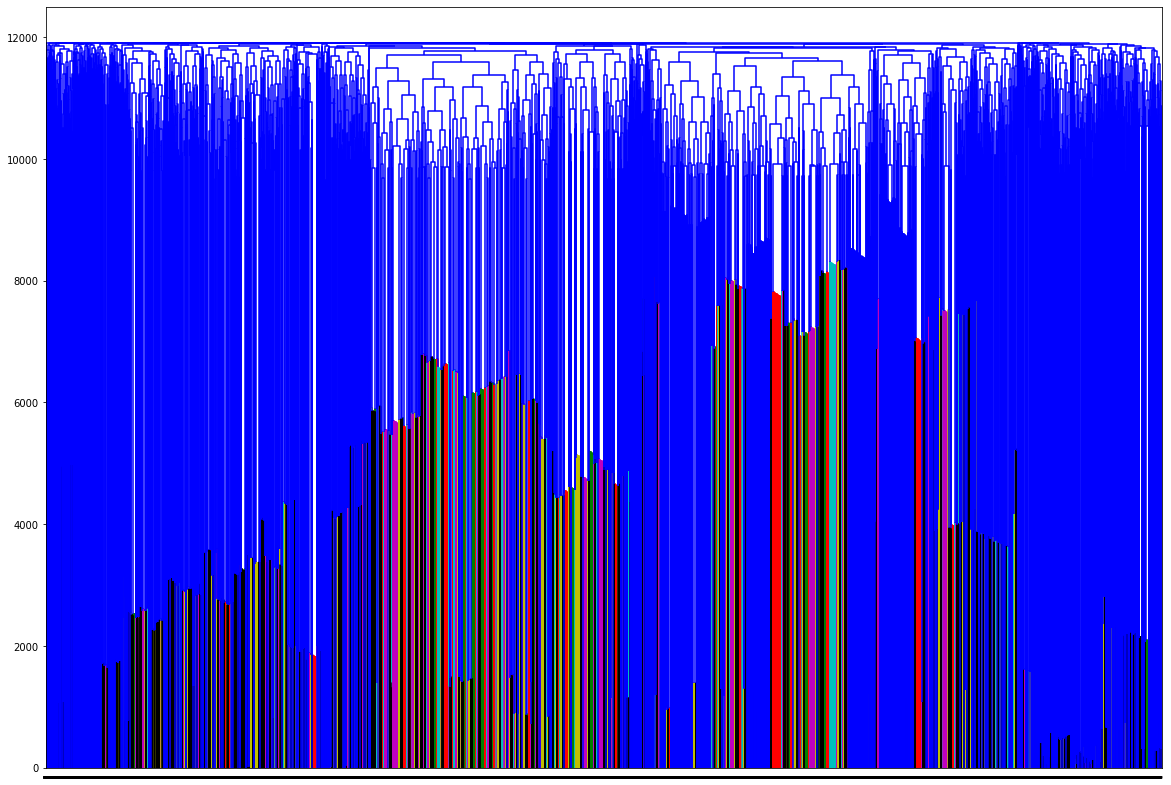

In [ ]:
plot_dendrogram(agglo_cluster, labels=agglo_cluster.labels_)

### Clustering 2: 3 clusters

In [ ]:
agglo_cluster1 = AgglomerativeClustering(n_clusters=3, linkage='average') 
agglo_cluster1.fit(X_norm[['Engine HP', 'Year', 'Engine Cylinders']])

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3)

In [ ]:
fig = px.scatter_3d(X, x='Engine HP', y='Year', z='Engine Cylinders', color=agglo_cluster1.labels_)
fig.show()

In [ ]:
silhouette_avg1 = silhouette_score(X_norm[['Engine HP', 'Year', 'Engine Cylinders']], agglo_cluster1.labels_)
print("For n_clusters =", 3,
      "The average silhouette_score is :", silhouette_avg1)

For n_clusters = 3 The average silhouette_score is : 0.5487803929804944


## K-Means Clustering


### GridSearch

In [ ]:
param_grid_kmeans = {
    'n_clusters': range(2, 9),
    'init': ['k-means++', 'random']
    }
cv = [(slice(None), slice(None))]
def silhouette_scr(estimator, X):
  estimator.fit(X)
  labels = estimator.labels_
  sil_avg = silhouette_score(X, labels)
  return sil_avg
grid_search_kmeans = GridSearchCV(estimator=KMeans(), param_grid=param_grid_kmeans,
              scoring=silhouette_scr, cv=cv, n_jobs=-1)
grid_search_kmeans.fit(X_norm[['Engine HP', 'Year', 'Engine Cylinders']])
print("parameter: %s",grid_search_kmeans.best_params_)
print("silhouette score: ", grid_search_kmeans.best_score_)

parameter: %s {'init': 'k-means++', 'n_clusters': 2}
silhouette score:  0.5765262665810766


### KMeans 2 clusters

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_norm[['Engine HP', 'Year', 'Engine Cylinders']])
print("silhouette score: ", silhouette_score(X_norm[['Engine HP', 'Year', 'Engine Cylinders']], kmeans.labels_))

silhouette score:  0.5765262665810766


In [ ]:
fig = px.scatter_3d(X, x='Engine HP', y='Year', z='Popularity', color=grid_search_kmeans.best_estimator_.labels_)
fig.show()

# Clustering Engine HP & Cylinder

## Hierarchical

In [ ]:
param_grid = {
    'n_clusters': range(2, 11),
    'linkage': ['ward', 'complete', 'average', 'single']
    }
cv = [(slice(None), slice(None))]
def silhouette_scr(estimator, X_norm):
  estimator.fit(X_norm)
  labels = estimator.labels_
  sil_avg = silhouette_score(X_norm, labels)
  return sil_avg
grid_search_hp_cylinder = GridSearchCV(estimator=AgglomerativeClustering(), param_grid=param_grid,
              scoring=silhouette_scr, cv=cv, n_jobs=-1)
grid_search_hp_cylinder.fit(X_norm[['Engine HP', 'Engine Cylinders']])
print("parameter: ", grid_search_hp_cylinder.best_params_)
print("silhouette score: ", grid_search_hp_cylinder.best_score_)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



parameter:  {'linkage': 'average', 'n_clusters': 2}
silhouette score:  0.8070506727056838


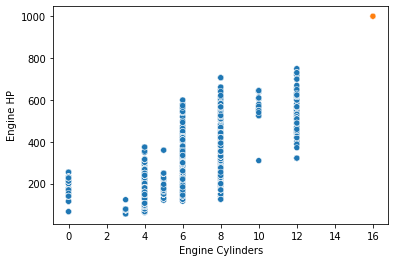

In [ ]:
sns.scatterplot(data=X, y='Engine HP', x='Engine Cylinders', hue=grid_search_hp_cylinder.best_estimator_.labels_, legend=False)

## Kmeans

In [ ]:
param_grid_kmeans2 = {
    'n_clusters': range(2, 11),
    'init': ['k-means++', 'random']
    }
cv = [(slice(None), slice(None))]
def silhouette_scr(estimator, X):
  estimator.fit(X)
  labels = estimator.labels_
  sil_avg = silhouette_score(X, labels)
  return sil_avg
grid_search_kmeans2 = GridSearchCV(estimator=KMeans(), param_grid=param_grid_kmeans2,
              scoring=silhouette_scr, cv=cv, n_jobs=-1)
grid_search_kmeans2.fit(X_norm[['Engine HP', 'Engine Cylinders']])
print("parameter: %s",grid_search_kmeans2.best_params_)
print("silhouette score: ", grid_search_kmeans2.best_score_)

parameter: %s {'init': 'k-means++', 'n_clusters': 9}
silhouette score:  0.5617385903649398


In [ ]:
grid_search_kmeans2.best_estimator_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

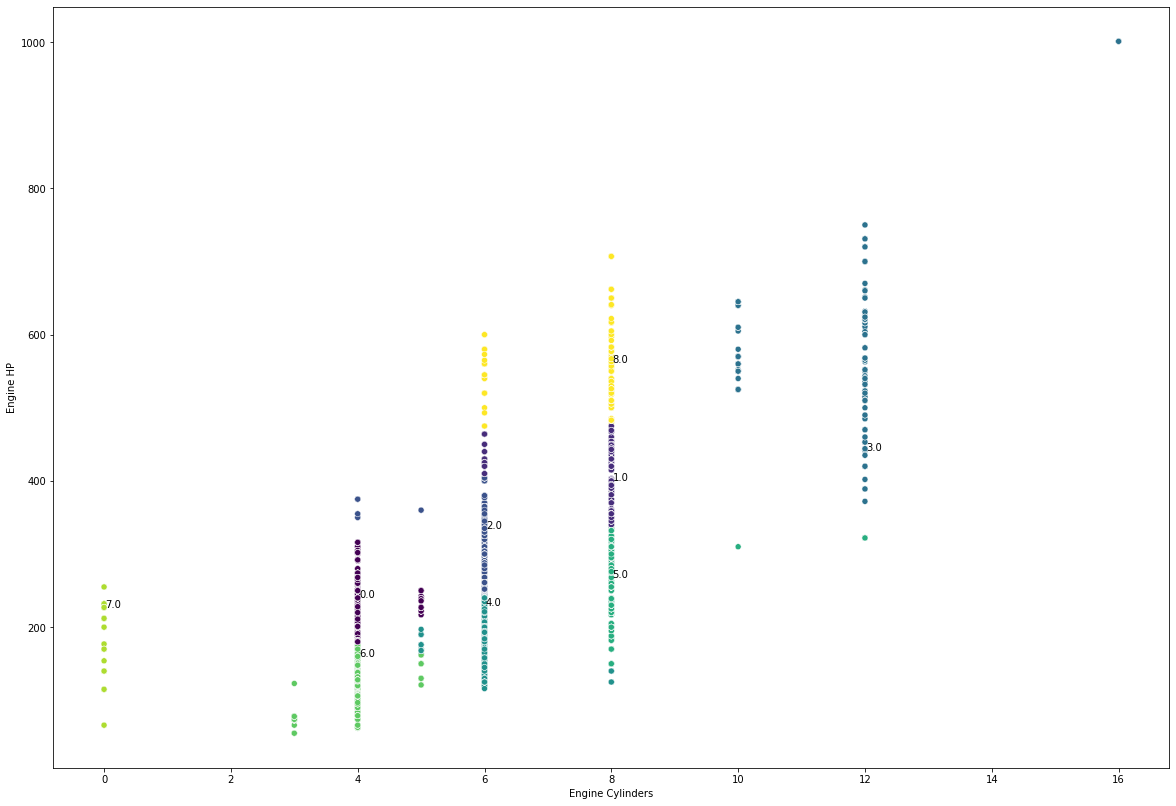

In [ ]:
fig, ax = plt.subplots(figsize=(20, 14))
sns.scatterplot(data=X, y='Engine HP', x='Engine Cylinders', c=grid_search_kmeans2.best_estimator_.labels_)
a = pd.concat({'x': X['Engine Cylinders'], 'y': X['Engine HP'], 'val': pd.Series(grid_search_kmeans2.best_estimator_.labels_)}, axis=1)
l = []
for i, point in a.iterrows():
  if str(point['val']) not in l:
    ax.text(point['x']+.02, point['y'], str(point['val']))
    l.append(str(point['val']))

# Clustering MPG

## Hierarchical

In [ ]:
param_grid = {
    'n_clusters': range(2, 11),
    'linkage': ['ward', 'complete', 'average', 'single']
    }
cv = [(slice(None), slice(None))]
def silhouette_scr(estimator, X_norm):
  estimator.fit(X_norm)
  labels = estimator.labels_
  sil_avg = silhouette_score(X_norm, labels)
  return sil_avg
grid_search_hp_year = GridSearchCV(estimator=AgglomerativeClustering(), param_grid=param_grid,
              scoring=silhouette_scr, cv=cv, n_jobs=-1)
grid_search_hp_year.fit(X_norm[['city mpg', 'highway MPG']])
print("parameter: ", grid_search_hp_year.best_params_)
print("silhouette score: ", grid_search_hp_year.best_score_)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



parameter:  {'linkage': 'average', 'n_clusters': 2}
silhouette score:  0.9398210652425895


In [ ]:
import time
start = time.process_time()
test = AgglomerativeClustering(n_clusters=2, linkage='average')
test.fit(X_norm[['city mpg', 'highway MPG']])
print(time.process_time() - start)

3.553897654


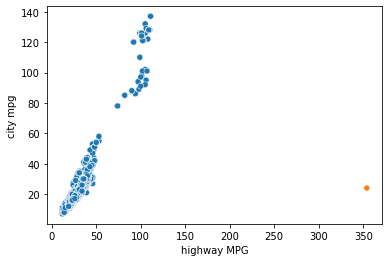

In [ ]:
sns.scatterplot(data=X, y='city mpg', x='highway MPG', hue=grid_search_hp_year.best_estimator_.labels_, legend=False)

## Kmeans

In [ ]:
param_grid_kmeans3 = {
    'n_clusters': range(2, 11),
    'init': ['k-means++', 'random']
    }
cv = [(slice(None), slice(None))]
def silhouette_scr(estimator, X):
  estimator.fit(X)
  labels = estimator.labels_
  sil_avg = silhouette_score(X, labels)
  return sil_avg
grid_search_kmeans3 = GridSearchCV(estimator=KMeans(), param_grid=param_grid_kmeans3,
              scoring=silhouette_scr, cv=cv, n_jobs=-1)
grid_search_kmeans3.fit(X_norm[['city mpg', 'highway MPG']])
print("parameter: %s",grid_search_kmeans3.best_params_)
print("silhouette score: ", grid_search_kmeans3.best_score_)

parameter: %s {'init': 'k-means++', 'n_clusters': 2}
silhouette score:  0.9303861071850784


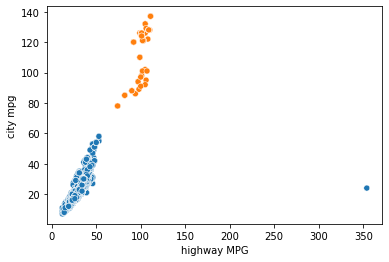

In [ ]:
sns.scatterplot(data=X, y='city mpg', x='highway MPG', hue=grid_search_kmeans3.best_estimator_.labels_, legend=False)

In [ ]:
start = time.process_time()
test2 = KMeans(n_clusters=2)
test2.fit(X_norm[['city mpg', 'highway MPG']])
print(time.process_time() - start)

0.20534956000000193
